In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import warnings
warnings.filterwarnings('ignore')

# ESPM 111 Ecosystem Ecology

## Lorenz Equations (1963)

This 3D system is a simple model of convection in the atmosphere (heating below, cooling above). Lorenz discovered that this deterministic model can have erratic dynamics: the solutions oscillate irregularly, never repeating but remaining in a bounded region of phase space: the lorenz attractor. This region in phase space attracts the trajectories toward it, but once inside, the trajectories repel each other so that there is not a final closed curve to maintain equilibrium.

$\frac{dx}{dt} = \sigma (y_t - x_t)$

$\frac{dy}{dt}= \rho x_t - y_t - x_tz_t$

$\frac{dz}{dt} = x_ty_t - \beta z_t$

where $\sigma$, $\rho$ and $\beta$ > 0 are parameters and Lorenz studied the particular cases when $\sigma$ = 10,  $\rho$ = 28 and $\beta$ = 8/3. 


<img src="https://blogs.egu.eu/divisions/as/files/2019/09/fig2-1.png" width="400">

learn more: 
- https://www.sciencedirect.com/science/article/pii/B9780128236659000079
- https://en.wikipedia.org/wiki/Lorenz_system

This code integrates the system of coupled differential equations numerically with:
- initial condition: $(x_0, y_0, z_0)$
- time step: $dt=0.01s$
- total simulation time: $T = 10s$ (N=1000 iterations)

But you can explore variations changing any of these parameters

In [3]:
def lorenz_eq(xt, yt, zt, s=10, r=28, b=8/3):
    dxdt = s*(yt - xt)
    dydt = r*xt - yt - xt*zt
    dzdt = xt*yt - b*zt
    return dxdt, dydt, dzdt

In [4]:
def simulate_lorenz(p0, N=1000, dt=0.01, s=10, r=28, b=8/3):
    x = [p0[0],]
    y = [p0[1],]
    z = [p0[2],]
    while len(x) < N:
        xt = x[-1]
        yt = y[-1]
        zt = z[-1]
        dxdt, dydt, dzdt = lorenz_eq(xt, yt, zt, s=s, r=r, b=b)
        x.append(xt + (dxdt * dt))
        y.append(yt + (dydt * dt))
        z.append(zt + (dzdt * dt))
    return x, y, z

We first have to define one or more initial conditions for $x_0$, $y_0$, $z_0$

In [5]:
initial_conditions = [[0., 1., 1],
                      [0., 1., 1.01],
                      [0., 1., 1.015]]

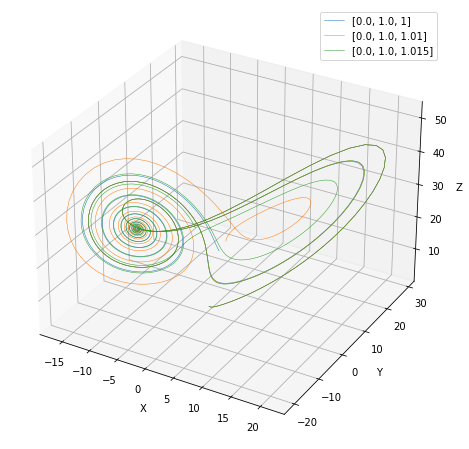

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

for p0 in initial_conditions:
    x, y, z = simulate_lorenz(p0, N=1000)
    ax.plot(x, y, z, lw=0.5,label=p0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

Here we visualize the time evolution in state-space of three different initial conditions placed close together

We see:
- distinct trajectories for each initial condition
- trajectories don't overlap
- trajectories don't connect

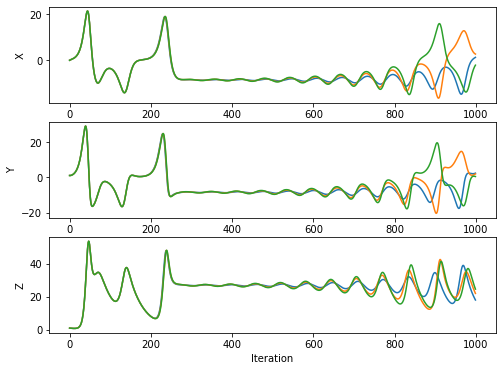

In [8]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

for p0 in initial_conditions:
    x, y, z = simulate_lorenz(p0)
    ax1.plot(x)
    ax2.plot(y)
    ax3.plot(z)

for ax, l in zip([ax1, ax2, ax3], ['X', 'Y', 'Z']):
    ax.set_ylabel(l)
    ax.set_xlabel('Iteration')

plt.show()

Here we visualize the time evolution of each dimension (x, y, z) seperately.

We see 
- the irregularity in the trajectories
- the runs follow eachother at first
- after a certain time, runs diverge

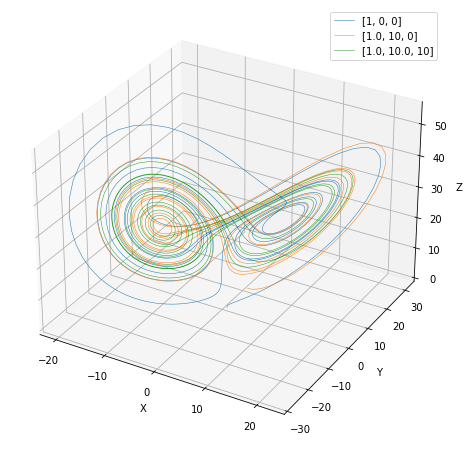

In [9]:
initial_conditions_far = [[1, 0, 0],
                          [1., 10, 0],
                          [1., 10., 10]]

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

for p0 in initial_conditions_far:
    x, y, z = simulate_lorenz(p0)
    ax.plot(x, y, z, lw=0.5,label=p0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

Here we chose initial conditions that are more far way. 

We see:
- they still attract to the same 'butterfly surface'

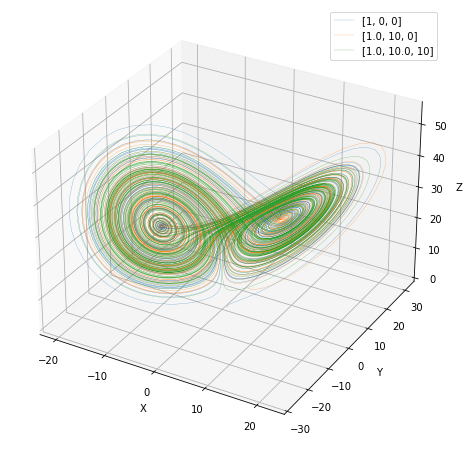

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

for p0 in initial_conditions_far:
    x, y, z = simulate_lorenz(p0, N=10000)
    ax.plot(x, y, z, lw=0.2,label=p0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

Here we increase the simulation time to 100s.

We see
- the 'lorenz attractor'

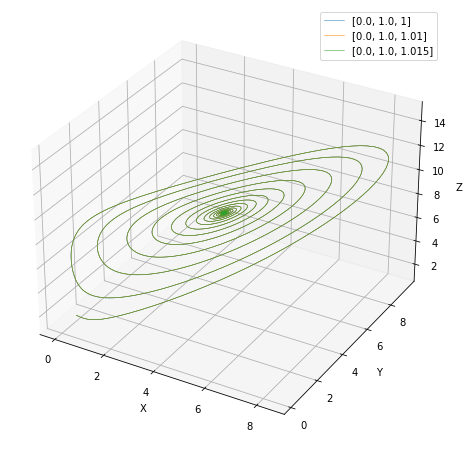

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

for p0 in initial_conditions:
    x, y, z = simulate_lorenz(p0, N=2500, s=10, r=10, b=2)
    ax.plot(x, y, z, lw=0.5, label=p0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()

We can also pick parameters that produce a more convergent form

we see:
- trajectories stay on more similar but paralell paths
- trajectories converge to a specific position in the long term

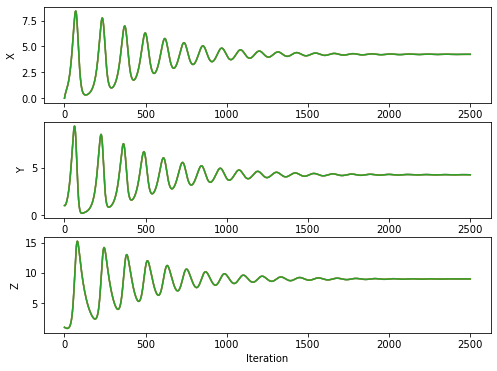

In [12]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

for p0 in initial_conditions:
    x, y, z = simulate_lorenz(p0, N=2500, s=10, r=10, b=2)
    ax1.plot(x)
    ax2.plot(y)
    ax3.plot(z)

for ax, l in zip([ax1, ax2, ax3], ['X', 'Y', 'Z']):
    ax.set_ylabel(l)
    ax.set_xlabel('Iteration')

plt.show()

A convergent variation of Lorenz equations for $x(t)$, $y(t)$ and $z(t)$